In [1]:
import csv
import os
import re
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline

In [34]:
def load_csv(file_name):
    df = pd.read_csv(file_name)
    return df

In [35]:
df = load_csv('./FinalData.csv')
df = df.drop(columns=["Unnamed: 0"])

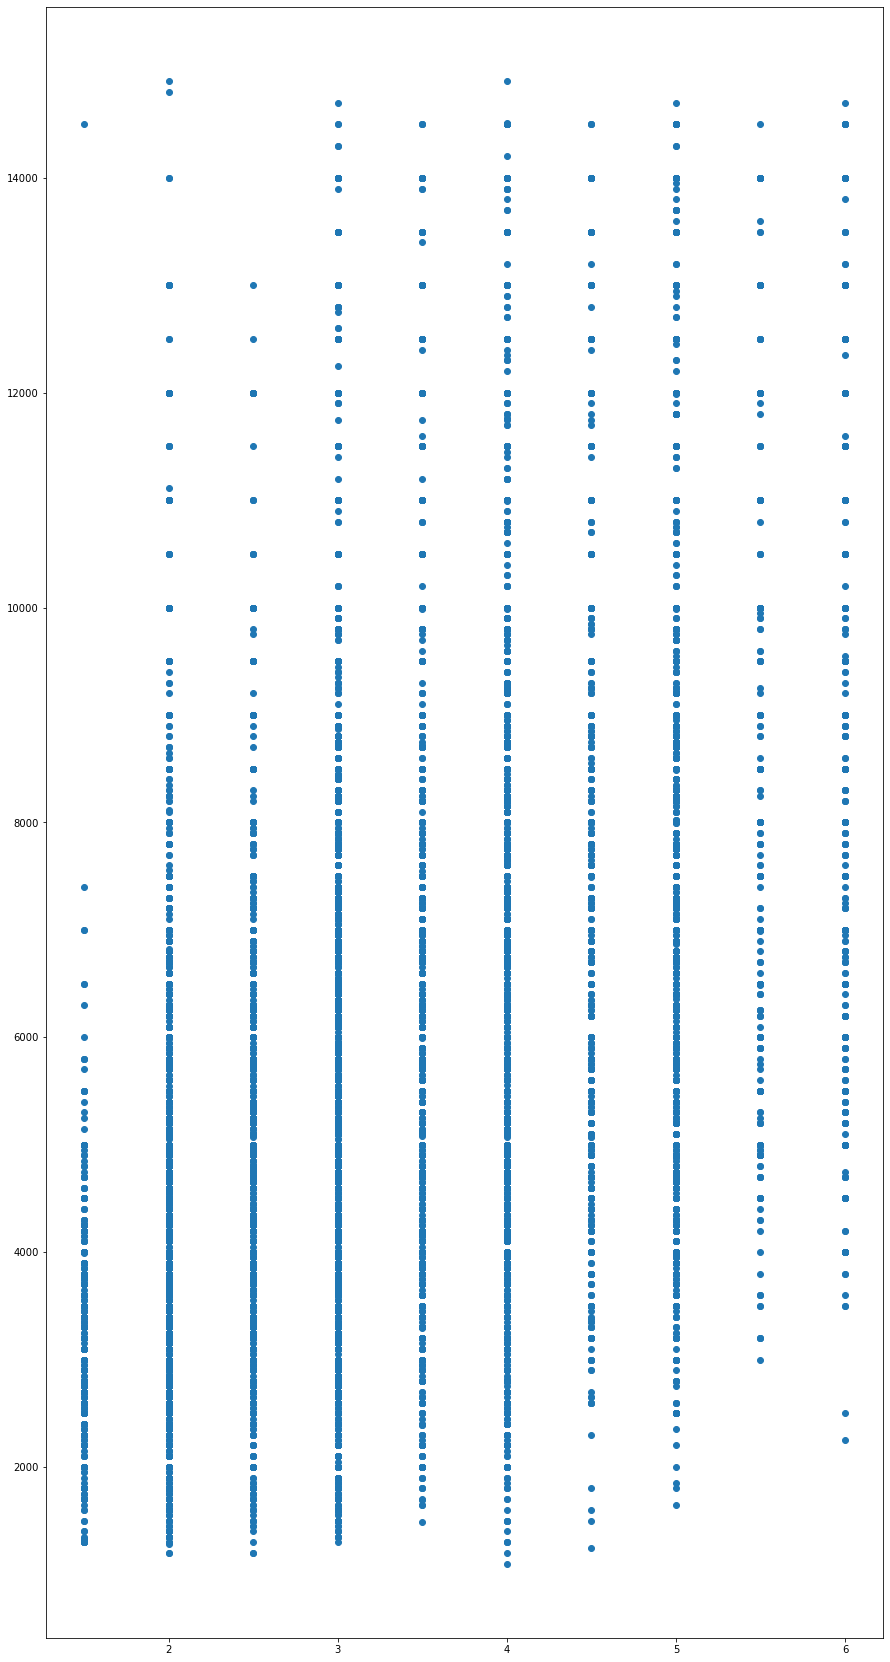

In [77]:
x = df["rooms"]
y = df["price"]

plt.figure(figsize=(15, 30))
plt.scatter(x, y)
plt.show()

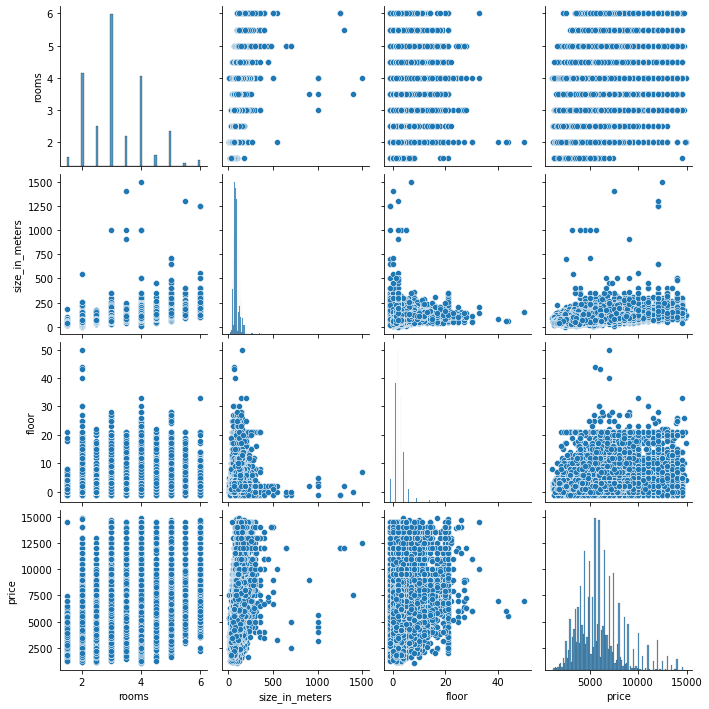

In [38]:
sns.pairplot(df[['rooms','size_in_meters','floor','price']])

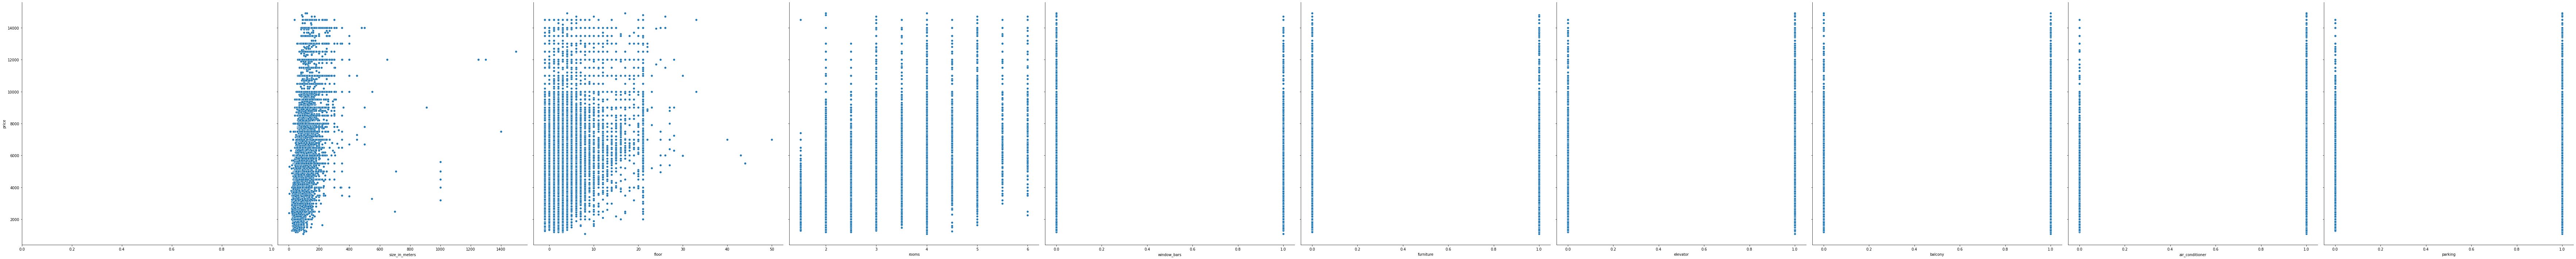

In [79]:
sns.pairplot(
    df,
    x_vars=["","size_in_meters","floor","rooms","window_bars","furniture","elevator","balcony","air_conditioner","parking"],
    y_vars=["price"],
    height=10
)

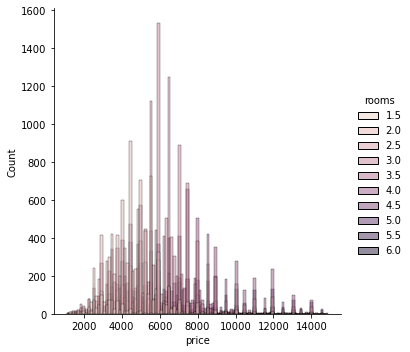

In [67]:
sns.displot(df, x="price", hue="rooms", fill=True)

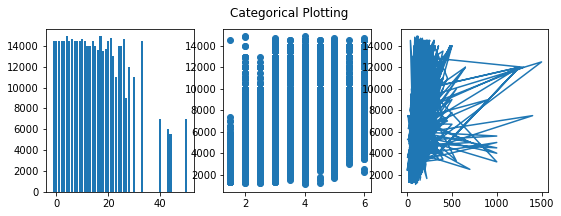

In [73]:
names = ['floor', 'rooms', 'size_in_meters']

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(df["floor"], df["price"])
plt.subplot(132)
plt.scatter(df["rooms"], df["price"])
plt.subplot(133)
plt.plot(df["size_in_meters"], df["price"])
plt.suptitle('Categorical Plotting')
plt.show()

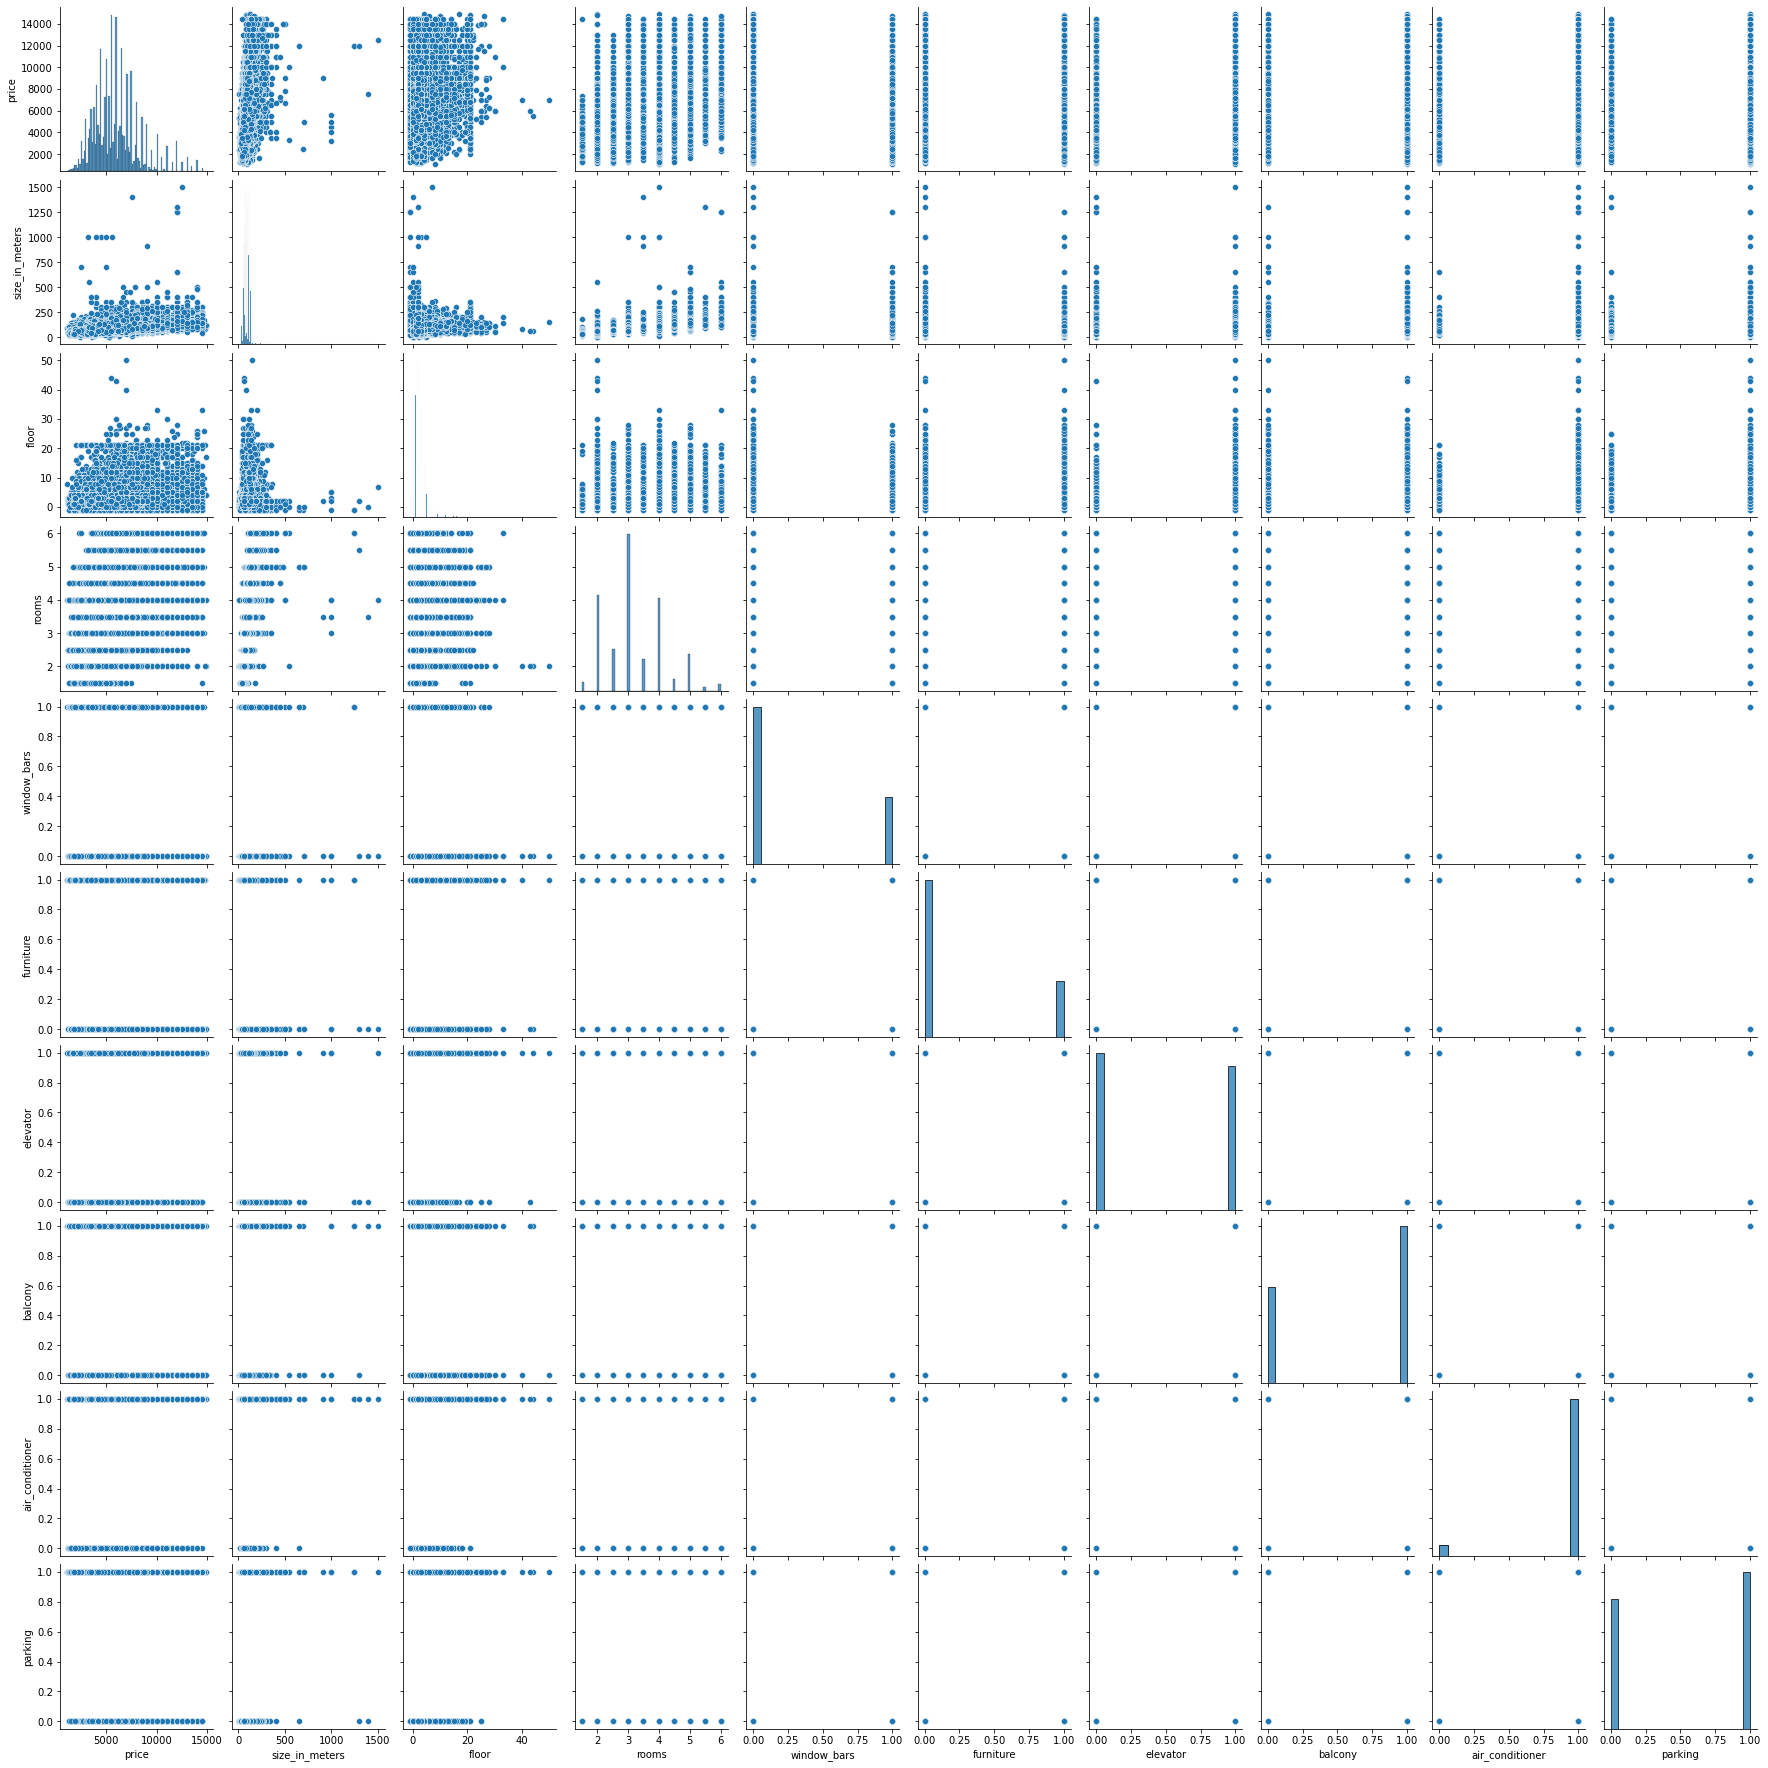

In [88]:
sns.pairplot(df[["price","size_in_meters","floor","rooms","window_bars","furniture","elevator","balcony","air_conditioner","parking"]])

In [52]:
df

,apartment_type,rooms,price,window_bars,partners,furniture,elevator,balcony,air_conditioner,parking,floor,max_floor,size_in_meters
0,דירת גג,4.0,8800.0,0,0,0.0,1,1,1,1,5.0,6.0,100.0
1,דירה,2.5,3200.0,0,0,0.0,0,1,1,1,2.0,4.0,50.0
2,דירה,3.5,3500.0,0,0,0.0,0,0,1,0,1.0,4.0,80.0
3,דירה,3.0,5500.0,0,0,0.0,0,1,1,0,1.0,3.0,90.0
4,דירה,4.0,10000.0,0,0,0.0,1,0,1,1,1.0,6.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48386,דירה,3.5,8700.0,0,0,1.0,1,0,1,1,10.0,15.0,110.0
48387,דירה,3.0,6200.0,0,0,1.0,0,1,1,0,3.0,3.0,60.0
48388,דירה,3.0,6200.0,0,0,1.0,0,1,1,0,3.0,3.0,60.0
48389,דירה,2.0,4200.0,0,0,0.0,0,0,1,1,3.0,4.0,65.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48391 entries, 0 to 48390
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   apartment_type   48391 non-null  object 
 1   rooms            48391 non-null  float64
 2   price            48391 non-null  float64
 3   window_bars      48391 non-null  int64  
 4   partners         48391 non-null  int64  
 5   furniture        48391 non-null  float64
 6   elevator         48391 non-null  int64  
 7   balcony          48391 non-null  int64  
 8   air_conditioner  48391 non-null  int64  
 9   parking          48391 non-null  int64  
 10  floor            48391 non-null  float64
 11  max_floor        48391 non-null  float64
 12  size_in_meters   48391 non-null  float64
dtypes: float64(6), int64(6), object(1)
memory usage: 4.8+ MB
